## Initial Setup for importing the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install PyDrive

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# downloaded_train = drive.CreateFile({'id':'1ueyp9R3jOkbYtvMjVZ_Cx770CsN_JHsw'})
# downloaded_train.GetContentFile('train.csv')

# downloaded_test = drive.CreateFile({'id':'1X0b1qfYlkvLTe1XD8QVhProb-NpMSInK'})
# downloaded_test.GetContentFile('test.csv')

In [3]:
# !gdown --id 1ueyp9R3jOkbYtvMjVZ_Cx770CsN_JHsw
# !gdown --id 1X0b1qfYlkvLTe1XD8QVhProb-NpMSInK

## Importing required libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.base import ClassifierMixin

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Importing the dataset

In [5]:
dataset_train = pd.read_csv("./Dataset/train.csv")
dataset_test = pd.read_csv("./Dataset/test.csv")
len(dataset_train), len(dataset_test)

(1143, 286)

## Dividing between features and target attributes

In [6]:
X_train = dataset_train.drop('depressed', axis=1)
X_train = X_train.drop('survey_date', axis=1)

X_test = dataset_test.drop('depressed', axis=1)
X_test = X_test.drop('survey_date', axis=1)

In [7]:
Y_train = dataset_train['depressed'].copy()
Y_test = dataset_test['depressed'].copy()

## For filling missing data values

In [8]:
for column in X_train.columns:
    print(f"{column} -- Null values = {X_train[column].isnull().sum().sum()}")

surveyid -- Null values = 0
village -- Null values = 0
femaleres -- Null values = 0
age -- Null values = 0
married -- Null values = 0
children -- Null values = 0
hhsize -- Null values = 0
edu -- Null values = 0
hh_children -- Null values = 0
hh_totalmembers -- Null values = 334
cons_nondurable -- Null values = 0
asset_livestock -- Null values = 0
asset_durable -- Null values = 0
asset_phone -- Null values = 0
asset_savings -- Null values = 0
asset_land_owned_total -- Null values = 0
asset_niceroof -- Null values = 0
cons_allfood -- Null values = 0
cons_ownfood -- Null values = 0
cons_alcohol -- Null values = 43
cons_tobacco -- Null values = 20
cons_med_total -- Null values = 0
cons_med_children -- Null values = 419
cons_ed -- Null values = 0
cons_social -- Null values = 0
cons_other -- Null values = 0
ent_wagelabor -- Null values = 0
ent_ownfarm -- Null values = 0
ent_business -- Null values = 0
ent_nonagbusiness -- Null values = 0
ent_employees -- Null values = 0
ent_nonag_revenue -- 

In [9]:
# Training data filling
for column in X_train.columns:
    count = X_train[column].isnull().sum().sum()
    if count != 0:
        mean_of_column = X_train[column].mean()
        X_train[column].replace(to_replace = np.nan, value=mean_of_column, inplace=True)

In [10]:
# Testing data filling
# Possible Error: Not mentioned in the paper
X_test = X_test.replace('.d', np.nan)
X_test = X_test.astype({'age': 'float'})
for column in X_test.columns:
  count = X_test[column].isnull().sum().sum()
  if count != 0:
    mean = X_test[column].mean()
    X_test[column].replace(to_replace = np.nan, value= mean, inplace=True)

## Implementing the Random forest classifier for feature selection

In [11]:
forest_classifier = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

forest_classifier.fit(X_train, Y_train)

for feature in zip(X_train.columns.values.tolist(), forest_classifier.feature_importances_):
    print(feature)

('surveyid', 0.07161696696872082)
('village', 0.06942616589206276)
('femaleres', 0.007894921599378428)
('age', 0.06857539058610562)
('married', 0.012471646662773363)
('children', 0.03674094829337496)
('hhsize', 0.03456649195546171)
('edu', 0.052684213275524985)
('hh_children', 0.008330156954051909)
('hh_totalmembers', 0.010360819061108235)
('cons_nondurable', 0.016432813493734155)
('asset_livestock', 0.018591681844905752)
('asset_durable', 0.02002833989589627)
('asset_phone', 0.013642270047206587)
('asset_savings', 0.010970887160161006)
('asset_land_owned_total', 0.01151696375370724)
('asset_niceroof', 6.955537623496502e-06)
('cons_allfood', 0.01685008916768938)
('cons_ownfood', 0.016783985259534232)
('cons_alcohol', 0.009488845805344372)
('cons_tobacco', 0.006264688580577835)
('cons_med_total', 0.00969850997208597)
('cons_med_children', 0.0076181923240397804)
('cons_ed', 0.014324384761181806)
('cons_social', 0.02077214136267296)
('cons_other', 0.015939805949369994)
('ent_wagelabor', 0

In [12]:
sfm = SelectFromModel(forest_classifier, threshold=0.006)

sfm.fit(X_train, Y_train)

final_features=[]
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns.values.tolist()[feature_list_index])
    final_features.append(X_train.columns.values.tolist()[feature_list_index])
    
print(len(final_features))

surveyid
village
femaleres
age
married
children
hhsize
edu
hh_children
hh_totalmembers
cons_nondurable
asset_livestock
asset_durable
asset_phone
asset_savings
asset_land_owned_total
cons_allfood
cons_ownfood
cons_alcohol
cons_tobacco
cons_med_total
cons_med_children
cons_ed
cons_social
cons_other
ent_nonag_revenue
ent_farmrevenue
ent_farmexpenses
ent_animalstockrev
ent_total_cost
fs_adskipm_often
fs_adwholed_often
fs_chskipm_often
fs_chwholed_often
fs_meat
med_expenses_hh_ep
med_expenses_sp_ep
med_expenses_child_ep
med_portion_sickinjured
med_port_sick_child
med_afford_port
med_sickdays_hhave
med_healthconsult
ed_expenses
ed_expenses_perkid
ed_schoolattend
ed_sch_missedpc
ed_work_act_pc
durable_investment
nondurable_investment
amount_received_mpesa
net_mpesa
saved_mpesa
day_of_week
54


In [13]:
X_train.filter(final_features)
X_test.filter(final_features)

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,durable_investment,nondurable_investment,amount_received_mpesa,net_mpesa,saved_mpesa,day_of_week
0,901,181,1,21.0,0,3,4,10,3,4.000000,...,0.000000,0.000000,0.000000,0.775476,569.850340,48.166222,0.000000,0.000000,1,3
1,498,47,1,44.0,1,6,8,6,6,8.000000,...,3.651504,0.800000,3.000000,1.600000,252.650100,14.711897,0.000000,0.000000,0,2
2,710,8,1,23.0,1,1,3,7,1,3.000000,...,8.648300,1.000000,1.000000,0.775476,141.736020,0.720692,0.000000,0.000000,1,1
3,433,25,1,67.0,0,0,1,1,0,1.000000,...,15.852179,0.696575,1.263021,0.775476,58.287693,4.804611,0.000000,0.000000,0,3
4,44,2,1,40.0,1,4,6,7,4,6.000000,...,6.826551,1.000000,1.250000,0.750000,440.223750,10.480058,0.000000,0.000000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,255,22,1,25.0,1,1,3,7,0,5.163265,...,15.852179,0.696575,1.263021,0.775476,0.000000,0.000000,0.000000,0.000000,0,1
282,547,69,1,28.0,1,4,6,10,4,6.000000,...,52.583797,0.666667,3.333333,0.500000,182.347700,47.384361,0.000000,0.000000,1,5
283,893,184,1,66.0,0,0,1,1,0,1.000000,...,15.852179,0.696575,1.263021,0.775476,46.444572,0.104545,0.000000,0.000000,0,3
284,363,75,1,51.0,1,1,3,12,0,5.163265,...,15.852179,0.696575,1.263021,0.775476,0.000000,0.000000,0.000000,0.000000,0,3


In [14]:
X_test.replace(to_replace = '.d', value=25, inplace=True)

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=1) # Train-Validation split

## Applying different models to see which yields the best accuracy

### Support Vector Machine

#### Linear Kernel

In [16]:
svm_classifier_linear = LinearSVC(C = 5)
svm_classifier_linear.fit(X_train, Y_train)

LinearSVC(C=5)

#### RBF Kernel

In [17]:
svm_classifier_rbf = SVC(kernel='rbf', C=5)
svm_classifier_rbf.fit(X_train,Y_train)

SVC(C=5)

#### Polynomial Kernel

In [18]:
svm_classifier_poly = SVC(kernel = 'poly', degree=2)
svm_classifier_poly.fit(X_train, Y_train)

SVC(degree=2, kernel='poly')

#### Predictions for each model

In [19]:
Y_pred_svm_linear = svm_classifier_linear.predict(X_val)
Y_pred_svm_rbf = svm_classifier_rbf.predict(X_val)
Y_pred_svm_poly = svm_classifier_poly.predict(X_val)

Classification Report for SVM linear model
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       285
           1       0.34      0.28      0.30        58

    accuracy                           0.79       343
   macro avg       0.60      0.58      0.59       343
weighted avg       0.77      0.79      0.78       343



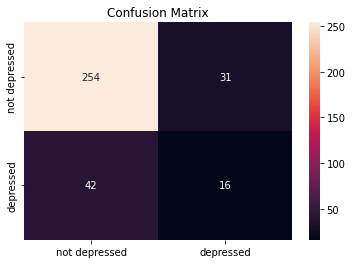

In [20]:
conf_mat = confusion_matrix(Y_val, Y_pred_svm_linear)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM linear model")
print(classification_report(Y_val, Y_pred_svm_linear))

Classification Report for SVM RBF model
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



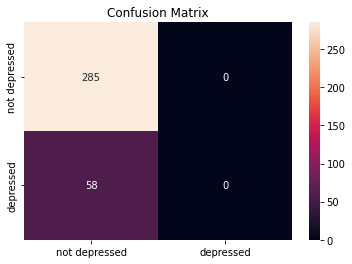

In [21]:
conf_mat = confusion_matrix(Y_val, Y_pred_svm_rbf)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM RBF model")
print(classification_report(Y_val, Y_pred_svm_rbf))

Classification Report for SVM Polynomial model
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



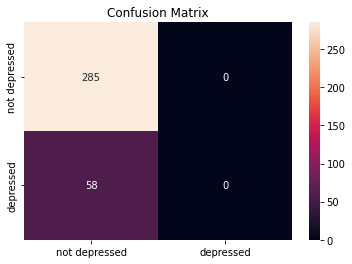

In [22]:
conf_mat = confusion_matrix(Y_val, Y_pred_svm_poly)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for SVM Polynomial model")
print(classification_report(Y_val, Y_pred_svm_poly))

### Logistic Regression

In [23]:
lr_clf = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
lr_clf.fit(X_train, Y_train)

Y_pred_lr = lr_clf.predict(X_val)

Classification Report for Logistic Regression model
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       285
           1       0.26      0.09      0.13        58

    accuracy                           0.80       343
   macro avg       0.55      0.52      0.51       343
weighted avg       0.74      0.80      0.76       343



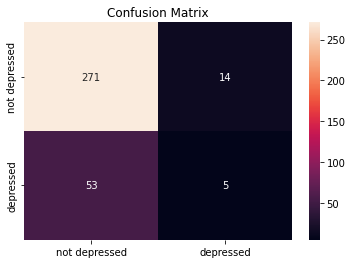

In [24]:
conf_mat = confusion_matrix(Y_val, Y_pred_lr)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for Logistic Regression model")
print(classification_report(Y_val, Y_pred_lr))

### Decision tree

#### Decision tree_1


In [25]:
decision_tree = DecisionTreeClassifier( criterion = 'gini')
decision_tree.fit(X_train, Y_train)

Y_pred_dt1 = decision_tree.predict(X_val)

Classification Report forDecision Tree 1 model
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       285
           1       0.15      0.16      0.15        58

    accuracy                           0.71       343
   macro avg       0.49      0.49      0.49       343
weighted avg       0.71      0.71      0.71       343



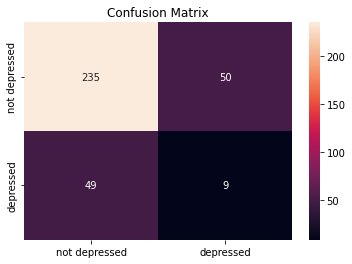

In [26]:
conf_mat = confusion_matrix(Y_val, Y_pred_dt1)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot() 

print("Classification Report forDecision Tree 1 model")
print(classification_report(Y_val, Y_pred_dt1))

#### Decision tree_2

In [27]:
decision_tree = DecisionTreeClassifier( criterion = 'gini', max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=2, splitter = "random")
decision_tree.fit(X_train, Y_train)

Y_pred_dt2 = decision_tree.predict(X_val)

Classification Report forDecision Tree 2 model
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       285
           1       0.12      0.02      0.03        58

    accuracy                           0.81       343
   macro avg       0.48      0.50      0.46       343
weighted avg       0.71      0.81      0.75       343



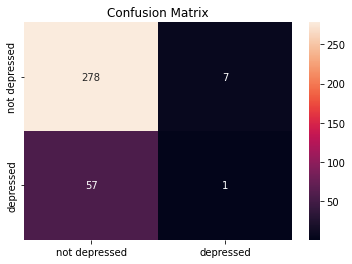

In [28]:
conf_mat = confusion_matrix(Y_val, Y_pred_dt2)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report forDecision Tree 2 model")
print(classification_report(Y_val, Y_pred_dt2))

#### Decision tree_3



In [29]:
decision_tree = DecisionTreeClassifier( criterion = 'entropy', max_depth=6, max_leaf_nodes=10, min_samples_leaf=5, splitter = "best")
decision_tree.fit(X_train, Y_train)

Y_pred_dt3 = decision_tree.predict(X_val)

Classification Report forDecision Tree 3 model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       285
           1       0.00      0.00      0.00        58

    accuracy                           0.82       343
   macro avg       0.41      0.49      0.45       343
weighted avg       0.69      0.82      0.75       343



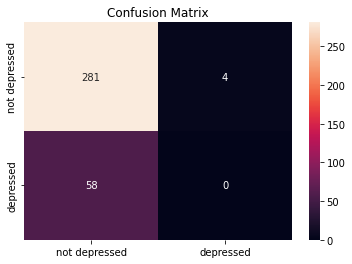

In [30]:
conf_mat = confusion_matrix(Y_val, Y_pred_dt3)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report forDecision Tree 3 model")
print(classification_report(Y_val, Y_pred_dt3))

### Random Forest with Grid Search

Best Score: 0.83125
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}
Classification Report for Random forest model
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.42      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



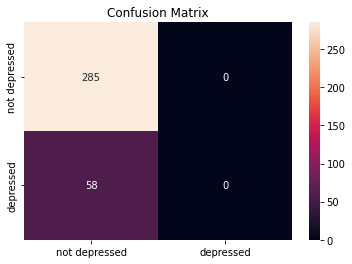

In [31]:
search_space = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 120, 150] 
}

model_rf = RandomForestClassifier()
grid_search = GridSearchCV(model_rf, search_space, scoring='accuracy', n_jobs=-1)
grid_search_result = grid_search.fit(X_train, Y_train)

print('Best Score: %s' % grid_search_result.best_score_)
print('Best Hyperparameters: %s' % grid_search_result.best_params_)

rf_predictions = grid_search.predict(X_val)

confusion_matrix_rf = confusion_matrix(Y_val, rf_predictions)

confusion_matrix_dataframe_rf = pd.DataFrame(confusion_matrix_rf, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(confusion_matrix_dataframe_rf, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for Random forest model")
print(classification_report(Y_val, rf_predictions))

### Gradient Boosting 

/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in v

/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in v

/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
/home/chaitanya/Machine Learning material/Course project/collegeCourseEnv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in v

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       285
           1       0.60      0.05      0.10        58

    accuracy                           0.83       343
   macro avg       0.72      0.52      0.50       343
weighted avg       0.80      0.83      0.77       343



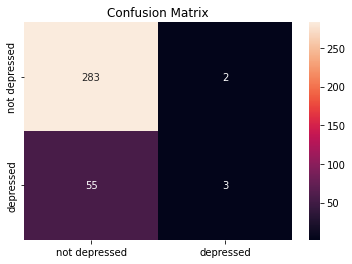

In [32]:
gb_clf2 = GradientBoostingClassifier()
grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [3, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [10, 20],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error']
}
grid_search_model = GridSearchCV(gb_clf2, grid, scoring='accuracy', n_jobs=-1)
grid_clf2 = grid_search_model.fit(X_train, Y_train)
predictions = grid_search_model.predict(X_val)

conf_mat = confusion_matrix(Y_val, predictions)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification Report for Gradient Boosting")
print(classification_report(Y_val, predictions))

### Voting 
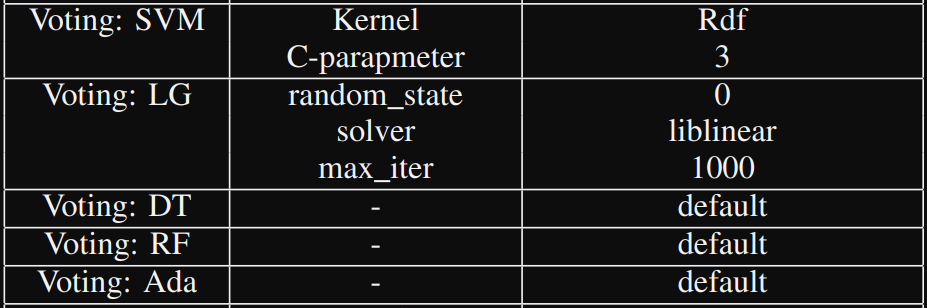

Classification report for Voting ensemble model
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       285
           1       0.00      0.00      0.00        58

    accuracy                           0.83       343
   macro avg       0.41      0.50      0.45       343
weighted avg       0.69      0.83      0.75       343



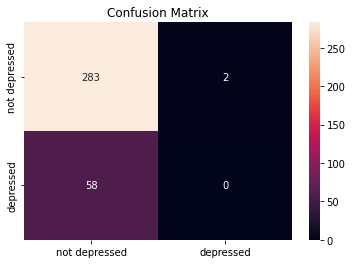

In [33]:
from sklearn.ensemble import VotingClassifier
svm_voting = SVC(kernel='rbf', C=3)
lr_voting = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
dt_voting = DecisionTreeClassifier()
rf_voting = RandomForestClassifier()
gb_voting = GradientBoostingClassifier()

voters = [
          ('svm', svm_voting), 
          ('lr', lr_voting), 
          ('dt', dt_voting), 
          ('rf', rf_voting), 
          ('gb', gb_voting)]

v_clf = VotingClassifier(voters)

v_clf.fit(X_train, Y_train)

Y_pred_ve = v_clf.predict(X_val)

conf_mat = confusion_matrix(Y_val, Y_pred_ve)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['not depressed', 'depressed']],
                  columns = [i for i in ['not depressed', 'depressed']])
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.plot()

print("Classification report for Voting ensemble model")
print(classification_report(Y_val, Y_pred_ve))